In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize
import os
import subprocess
import cv2 
from PIL import Image 

#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)
import OneD.Wave as Wave
import OneD.NBody as NB
import OneD.Global as GF



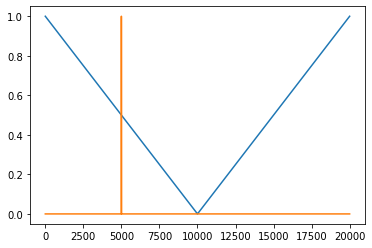

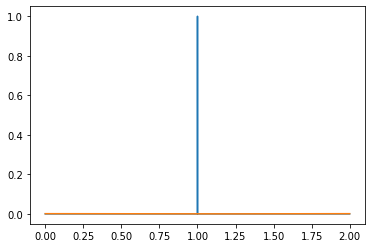

In [5]:
N=10**4
rho = np.zeros(N)
rho[N//2]+=1
#rho[N//2+100]+=1

L=2
x = np.linspace(0,L,N)
G = 0.5*x
G = np.append(G[::-1],G)
plt.plot(G)
plt.plot(np.append(rho,np.zeros_like(rho)))
plt.show()

G_tilde = np.fft.rfft(G)
phi = GF.fourier_potential(rho,L,type = 'Isolated', G_tilde = G_tilde)
plt.plot(x,rho)
plt.plot(x,phi)
plt.show()

499
499.0


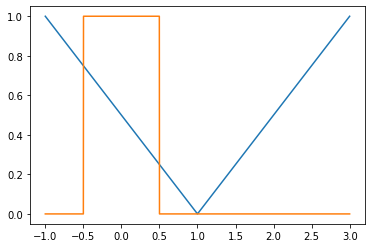

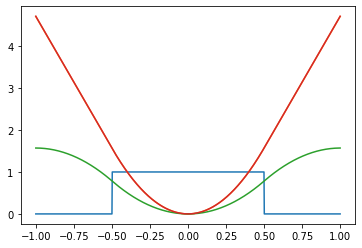

In [6]:
N=10**3
rho = np.zeros(N)
rho[N//2]+=1
Num = 1
for i in range(1,250):
    rho[N//2-i]+=1
    rho[N//2+i]+=1
    Num+=2
print(Num)
Num = np.sum(rho)
print(Num)
rho = rho#/Num #normalize

L=2
x = np.linspace(-L/2,L/2,N)
dx = x[1]-x[0]
x_long = np.linspace(-L,L,2*N)
G = np.abs(x_long)/2

x_long = np.linspace(-L/2,3*L/2,2*N)
plt.plot(x_long,G)
plt.plot(x_long,np.append(rho,np.zeros_like(rho)))
plt.show()

G_tilde = np.fft.rfft(G)
phi = GF.fourier_potential(rho,L,type = 'Isolated', G_tilde = G_tilde)
plt.plot(x,rho)
plt.plot(x,phi)
phi2 = GF.Periodic_Poisson(rho,L)
plt.plot(x,phi2)
#phi3 = GF.Isolated_Poisson(rho,dx,G_tilde)

#ANALYTIC SOLUTION
a = 0.5
#Domain(s) for analytic solution:
x_1 = np.linspace(-a,a,499)
x_2 = np.linspace(a,L/2,250)
x_3 = np.linspace(-L/2,-a,250)
x_full = np.append(x_3,np.append(x_1,x_2))
#Outputs on domains:
analytic_1 = 2*np.pi*(x_1)**2
analytic_2 = 2*np.pi*a*(2*x_2-a)
analytic_3 = -2*np.pi*a*(2*x_3+a)
analytic = np.append(analytic_3,np.append(analytic_1,analytic_2))
plt.plot(x_full,analytic)

plt.show()